# Exercise Sheet 2: Linear Algebra and TensorFlow Basics (Deadline: 14 Nov 14:00)

# Linear Algebra (11 points)
For theoretical tasks you are encouraged to write LaTeX. Jupyter notebooks support them simply by typing an expression between dollar signs or in the blocks like \ begin{equation} \ end{equation}.


Alternatively, you can upload the solutions in the written form as images and paste them inside cells. But if you do this, make sure that the images have high quality, so we can read them without any problems.

### 1. Orthogonal vectors (1 point)
Let $a, b$ be non-zero vectors in $R^n$. Show that $a^T b$ = 0 **if and only if** a and b are orthogonal vectors (i.e. angle between them equals $\frac{\pi}{2} + k \pi$ radians).

Hint: be careful to prove 2 directions: 
1.) $a^T b$ = 0 $\implies$ orthogonality and 2.) orthogonality $\implies$ $a^T b$ = 0.



#### Direction 1: $a^T b$ = 0 $\implies$ orthogonality

$a^T b$ = 0

$\lVert \mathbf{x} \rVert_2 \lVert \mathbf{y} \rVert_2 cos \theta = 0 $ (Law of Cosines, see also Goodfellow 2.34)

$cos \theta = \dfrac{0}{\lVert \mathbf{x} \rVert_2 \lVert \mathbf{y} \rVert_2} $

$cos \theta = 0 $

$\theta = \frac{\pi}{2} $

a and b are thus orthogonal.


#### Direction2: Orthogonality $\implies$ $a^T b$ = 0.

$a^T b = \lVert \mathbf{x} \rVert_2 \lVert \mathbf{y} \rVert_2 cos \frac{\pi}{2} $ (Law of Cosines, see also Goodfellow 2.34)

$cos \frac{\pi}{2} = \frac{a^T b}{\lVert \mathbf{x} \rVert_2 \lVert \mathbf{y} \rVert_2}$

$0 = \frac{a^T b}{\lVert \mathbf{x} \rVert_2 \lVert \mathbf{y} \rVert_2}$

$a^T b = 0$

### 2. Interpretation of matrix multiplication (2 points)
Let 
$$
A=\begin{bmatrix} 2 & 4 \\ 4 & 2 \\ 2 & 0 \end{bmatrix} \ \ \ \ 
B=\begin{bmatrix} 0.6 & -0.8 \\ 0.8 & 0.6 \end{bmatrix}
$$
a. Are the column vectors of B orthogonal? Orthonormal? Is B a rotation matrix? Justify your answers.(0.5 points)

The column vectors are:

Orthogonal because: $\begin{bmatrix}0.6 \\ -0.8 \end{bmatrix} \cdot \begin{bmatrix}0.8 \\ 0.6 \end{bmatrix}$ = 0

Orthonormal because: It is orthogonal and a Unit vector: $ \sqrt{(0.6)^2 + (0.8)^2} = 1 $ and $\sqrt{(-0.8)^2 + (0.6)^2} = 1 $

B is a rotation matrix because $ B^T = B^{-1} => \begin{bmatrix} 0.6 & 0.8 \\ -0.8 & 0.6 \end{bmatrix} = 1* \begin{bmatrix} 0.6 & 0.8 \\ -0.8 & 0.6 \end{bmatrix}$ with determinant being 1




b. Calculate $A \cdot B$. (0.5 points)

$A \cdot B = \begin{bmatrix} 4.4 & 0.8 \\ 4 & -2 \\ 1.2 & -1.6 \end{bmatrix}$


c. What is the interpretation of a matrix multiplication, when the column vectors of B are orthonormal (you may want to draw a simple picture visualizing row vectors of A and column vectors of B, but you don't need to submit it)? (1 point)

In the given example, B is an orthogonal matrix. As a consequence, $B^T B = B B^T = I$. Multiplying an orthogonal matrix by a vector, does not change its length or angles. --> No idea what they are after here or what it means for matrix times matrix multiplication. Was mir auffällt: Euclidian norm rows in A und rows in C ist identisch (Wurzel 20, Wurzel 20, 4). Was heißt das dann? Länge bleibt.


### 3. Property of $X^T X$ matrix (1 point)
Let $X \in R^{m×n}$ be a matrix obtained by stacking all training vectors (also called "design matrix"), like in the lecture. Obviously, it can be an arbritrary matrix. However a covariance matrix $C = X^T X$ has some interesting properties, namely it is always a positive semidefinite matrix ($v^T Cv \geq 0$ for all non-zero $v \in R^n$). Prove this statement.

#### C is always positive:
$v^T Cv = v^t (\frac{1}{n} \sum\limits_{i=1}^n (X_{i} - \overline{X})(X_{i} - \overline{X})^T) v$

$= \frac{1}{n} \sum\limits_{i=1}^n v^T (X_{i} - \overline{X})(X_{i} - \overline{X})^T) v$

$= \frac{1}{n} \sum\limits_{i=1}^n ((X_{i} - \overline{X})^T v) ((X_{i} - \overline{X})^T v))$ Term is scalar, i.e. equal to its own transpose, and $(AB)^T = B^T A^T$

$= \frac{1}{n} \sum\limits_{i=1}^n ((X_{i} - \overline{X})^T v))^2$

$\geq 0$


#### C is always semidefinite:

Hint: $v^T C v$ can be represented as a squared norm of some vector.



### 4. Eigendecomposition (4 points)
Consider the following matrix:
$$
M=\begin{bmatrix}
    1 & -1 & 0 \\
    -1 & 2 & -1 \\
    0 & -1 & 1
  \end{bmatrix}
$$
Is the matrix M:

a. Symmetric? What does it imply for its eigendecomposition? (0.5 points)

b. Singular? What does it imply for its eigendecomposition? (0.5 points)

c. Find the eigendecomposition of M (3 points).




### 5. Rayleigh-Ritz principle (3 points)
On the lecture we saw that the exact solution for decoding matrix D in PCA problem is a matrix that contains the $l$ eigenvectors corresponding to the largest eigenvalues of $X^T X$, where X is a design matrix. But where does it come from?

If you want to see full derivation of PCA, you can find it in Deep Learning Book, chapter 2.12. In this exercise we would like to focus only on Raleigh-Ritz principle, which allows to solve optimization problems of type $min_{||v||_2 = 1} v^T C v$ or $max_{||v||_2 = 1} v^T C v$ using eigendecomposition of C.

So prove that $min_{||v||_2 = 1} v^T C v = \lambda_{min}$, where $\lambda_{min}$ is the smallest eigenvalue of C. For which vector $v$ this minimum is attained? (the proof for $max_{||v||_2 = 1} v^T C v = \lambda_{max}$ is analogous).

# TensorFlow (9 points)

### 1. A simple computational graph in Tensorflow (2 + 1 = 3 points)
To get started with TensorFlow we ask you to specify a very simple computational graph of the function $f(x) = x^2 + 2x + 5$ and also taking its derivative.
If you don't know how to proceed, please study the example given on the lecture and also the official TenorFlow starting guide: https://www.tensorflow.org/get_started/get_started.

This exercise requires around 10 lines of code, it is simple enough. However, it is very important to understand the notion of computational graph. 

Actually, this simple example will be a backbone for all neural networks in the future. All what we will need is to specify first the forward pass (f), and then take derivatives with respect to parameters (x), in order to update them, so they minimize the loss function f. But we will come back to this in several weeks.

[  85.           83.20999146   81.44000244   79.68999481   77.96000671
   76.25         74.55999756   72.89000702   71.23999786   69.61000061
   68.           66.4099884    64.84000397   63.28999329   61.76000595
   60.25         58.75999069   57.29000092   55.83999634   54.41000748
   53.           51.61000061   50.24000549   48.88999939   47.55999756
   46.25         44.9600029    43.69000244   42.43999481   41.20999908
   40.           38.81000137   37.63999939   36.48999786   35.3599968
   34.25         33.16000366   32.09000397   31.03999901   30.00999832
   29.           28.01000214   27.04000282   26.08999825   25.15999985
   24.25         23.36000061   22.49000168   21.63999748   20.80999756
   20.           19.20999908   18.44000053   17.68999863   16.95999908
   16.25         15.56000042   14.8900013    14.23999786   13.60999966
   13.           12.4100008    11.84000015   11.29000092   10.75999928
   10.25          9.76000023    9.28999901    8.84000015    8.40999985
    8. 

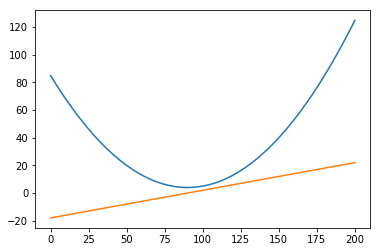

In [76]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt


### Define a simple comp. graph (note that all its components are special TensorFlow objects)
# Specify an input x to the comp. graph

x = tf.placeholder(tf.float32)

# Specify f(x) = x^2 + 2x + 5 
f = x ** 2 + 2 * x + 5

# Take derivative of f with respect to x. That will be very important in the future, since you will only
# need to specify forward pass of your neural network, and all derivatives will be determined automatically by 
# TensorFlow.

#d = tf.gradients(f, x)
d = 2 * x + 2

### Execute the comp. graph
# Create a TensorFlow session
sess = tf.Session()

# Evaluate the function value and its derivative for values from -10 to 10 with step 0.1
f_values = sess.run(f, {x : [v/10 for v in range(-100,101)]})
d_values = sess.run(d, {x : [v/10 for v in range(-100,101)]})
print(f_values)
print(d_values)

# Evaluate values of f and its derivative based on a particular input x
f_100 = sess.run(f, {x: 100})
d_100 = sess.run(f, {x: 100})

# Plot the function f (use matplotlib library)
plt.plot(f_values)

# Plot the derivative of the function f
plt.plot(d_values)




#### Tensorflow Questions:
1.) In the exercise above x should be a TF placeholder, but f is a TF tensor. What is the difference between a placeholder and other tensors in computational graph? And how TF Variable differs from tensors? (0.5 point)

A TF placeholder is a dummy node, i.e. an entry point to the computational graph for data to be provided later. Normal TF tensors just consist of a set of primitive values shaped into an array. TF variables are in-memory buffers containing tensors: Unlike tensors, they only hold values after being explicitly initialized.


2.) What does tf.Session().run(...) accept as an argument and what does it return? What is the fundamental difference between these 2 types of objects? (0.5 point)

tf.Session().run(...) accepts TF nodes and returns a value of the same shape: A single value if the argument was a single graph element, a list in case of a list, a dictionary with the same keys in case of a dictionary. The fundamental difference between before and after tf.Session().run(...) then is evaluation. The method is one step in an overall TF computation that runs the graph fragments necessary to excute every operation and to evaluate every tensor
in the argument it receives.

### 2. A pure Python implementation (1 point)
Please do the same, but in pure Python, calculating the expression for the derivative by hand. There is no need to use NumPy library, since we deal with 1-dimensional x (0.5 point). 

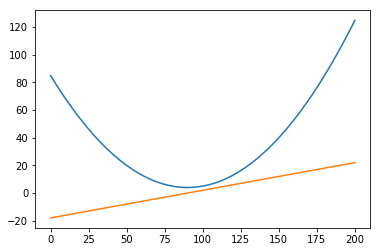

In [160]:
# Evaluate the function value and its derivative for values from -10 to 10 with step 0.1

# Define f
def f(x):
    return x ** 2 + 2 * x + 5

# Define f_derivative_val
def f_derivative_val(x):
    return 2 * x + 2 

# Plot the function f
f_vals = [f(v/10) for v in range(-100,101)]
plt.plot(f_vals)

# Plot the derivative of the function f
f_derivative_vals = [f_derivative_val(v/10) for v in range(-100,101)]
plt.plot(f_derivative_vals)

### 3. A more complicated computational graph (5 points)
Okay, you could easily take the derivative of $f(x) = x^2 + 2x + 5$ by hand. But what if you need to take the derivative of the function $f(x) = \sigma(-6 \sigma (x + 5 x^{-2} + 3 x^{-3}) + 2 \sigma (-x + 4 x^{-2}))$ (where $\sigma = \frac{1}{1 + exp(-x)}$) with respect to x?
It resembles a neural network much more than the previous example.
Please, implement it in TensorFlow (0.5 point) and in pure Python (0.5 point) in the same way as before (but using new cells with the code below). 

Note that in pure Python implementation you will need to somehow overcome the numerical errors for small values of x (roughly from -0.1 to 0.1). You can just skip these values.

For pure Python implementation you will need to derive the derivative by hand (3 points). Please write down your derivation for the new $f(x)$ (you are encouraged to write LaTeX for them):

The following variables are used to simplify the derivation and make everything more readable:

$a = (-6 \sigma (x + 5 x^{-2} + 3 x^{-3})$

$b = 2 \sigma (-x + 4 x^{-2}))$

For the quotient we get after applying the quotient rule right at the beginning of the derivation: $q = \left(\mathrm{e}^{-x}+1\right)^2 $

$\frac{df}{dx}$ = $ \frac{(\frac{df}{dx}[a+b] * (\mathrm{e}^{-x}+1)) - ((a+b) * \frac{df}{dx} [\mathrm{e}^{-x}+1])} {q}$ 

$=  \frac{(\frac{(-6 \frac{df}{dx}[x + 5x^{-2} + 3x^{-3}] * (\mathrm{e}^{-x}+1) - (x + 5x^{-2} + 3x^{-3}) * \frac{df}{dx} [\mathrm{e}^{-x}+1])}{q}) + (\frac{(2 \frac{df}{dx}[-x + 4x^{-2}] * (\mathrm{e}^{-x}+1) - (-x + 4x^{-2}) * \frac{df}{dx} [\mathrm{e}^{-x}+1])}{q}) * (\mathrm{e}^{-x}+1) - (\mathrm{e}^{-x} * \frac{df}{dx}[-x] + 0) * (a+b)} {q} $

$= \frac{\mathrm{e}^{-x} * (a+b) + (\mathrm{e}^{-x} +1) * (-6*(\frac{(\frac{df}{dx}[x] + 5* \frac{df}{dx}[x^{-2}] + 3* \frac{df}{dx}[x^{-3}])*(\mathrm{e}^{-x}+1)-(\frac{df}{dx}[\mathrm{e}^{-x}] + \frac{df}{dx}[1]) * (x + 5x^{-2} + 3 x^{-3}))}{q}) + 2* (\frac{((4 * \frac{df}{dx}[x^{-2}] - \frac{df}{dx}[x])*(\mathrm{e}^{-x}+1)-(\frac{df}{dx}[\mathrm{e}^{-x}] + \frac{df}{dx}[\frac{df}{dx}[1]) * (4x^{-2} - x))}{q}))}{q} $

$= \frac{\mathrm{e}^{-x} * (a+b) + (\mathrm{e}^{-x} +1) * (-6*(\frac{(1 + 5* (-2) * x^{-3} + 3* (-3) * x^{-4})*(\mathrm{e}^{-x} * (\frac{df}{dx}[x] + 0) * (x + 5x^{-2} + 3 x^{-3}))}{q}) + 2 * (\frac{(4 * (-2) * x^{-3} -1) * (\mathrm{e}^{-x}+1)-(\mathrm{e}^{-x} * \frac{df}{dx}[-x] + 0) * (4x^{-2} - x))}{q}))}{q} $

$= \frac{\mathrm{e}^{-x} * (a+b) + (\mathrm{e}^{-x} +1) * (-6*(\frac{(-10x^{-3} - 9 x^{-4} + 1)*(\mathrm{e}^{-x} +1) + (x + 5x^{-2} + 3 x^{-3}) * \mathrm{e}^{-x}}{q}) + 2 * \frac{((-8x^{-3} -1) * (\mathrm{e}^{-x} +1) + (4x^{-2} - x) * \mathrm{e}^{-x})}{q} }{q} $

Mit sigma als Funktion:

Use following variables and their derivates:

$\frac{d}{dx}[\sigma] = - \frac{\frac{d}{dx}[exp(-x)+1]}{(exp(-x)+1)^2}$ | Reciprocal rule 

$ = - \frac{\frac{d}{dx}[exp(-x)]+0}{(exp(-x)+1)^2}$

$ = - \frac{exp(-x)*\frac{d}{dx}[-x]}{(exp(-x)+1)^2}$  | Chain rule

$ = \frac{exp(x)}{(exp(x)+1)^2}$

$ a = 2 \sigma (-x + 4x^{-2})$

$ b = -6 \sigma (x + 5x^{-2} + 3x^{-3})$

$\frac{d}{dx}[a] = 2(  \frac{d}{dx}[\sigma](-x + 4x^{-2}) * (-1-8x^{-3}) )$ | chain rule 

$\frac{d}{dx}[b] = - 6(  \frac{d}{dx}[\sigma] (x + 5x^{-2} + 3x^{-3}) * (1-10x^{-3}-9x^{-4}) )$ | chain rule

Using those we get:



$\frac{df}{dx} = \frac{d}{dx}[ \sigma(a+b)](\frac{d}{dx}[a+b])$

$ = \frac{d}{dx}[ \sigma](a+b)(\frac{d}{dx}[a]+\frac{d}{dx}[b])$








The derived expression for $\frac{df}{dx}$ should produce exactly the same values (up to the float type precision) as TensorFlow derivative.



[ 0.88075793  0.88075376  0.88074923  0.88074416  0.8807385   0.88073242
  0.88072556  0.88071799  0.88070959  0.88070023  0.88069004  0.88067865
  0.88066614  0.88065225  0.88063687  0.88061988  0.88060111  0.88058025
  0.88055718  0.88053173  0.88050354  0.88047224  0.88043773  0.88039947
  0.88035715  0.88031018  0.88025826  0.88020086  0.88013715  0.88006657
  0.87998837  0.87990177  0.8798058   0.87969953  0.87958175  0.87945098
  0.87930614  0.87914544  0.87896711  0.87876934  0.87854981  0.87830603
  0.87803531  0.87773454  0.87740028  0.87702858  0.87661511  0.87615502
  0.87564272  0.87507188  0.87443548  0.87372553  0.87293285  0.87204707
  0.87105638  0.86994714  0.86870384  0.8673085   0.86574048  0.86397588
  0.86198652  0.85973984  0.85719752  0.85431451  0.85103685  0.84730101
  0.84303045  0.83813316  0.8324976   0.82598811  0.81843871  0.80964524
  0.79935586  0.7872588   0.77296865  0.75600982  0.73580045  0.71164125
  0.68271679  0.64812762  0.60698068  0.55857599  0

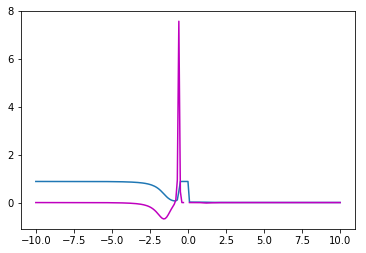

In [1]:
import numpy as np
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
# Please paste the code from your above TensorFlow implementation, 
# but specify the new f(x) and produce the corresponding plots
z = tf.placeholder(tf.float32)

# Specify f(x)
#First define sigmoid helper function:
def sigmoid (x):
    return 1/(1 + tf.exp(-x))

f = sigmoid(-6* sigmoid(z + 5 * z ** -2 + 3 * z ** -3) + 2 * sigmoid(-z + 4 * z ** -2))

# Take derivative of f with respect to x. That will be very important in the future, since you will only
# need to specify forward pass of your neural network, and all derivatives will be determined automatically by 
# TensorFlow.

d = tf.gradients(f,z)[0]

### Execute the comp. graph
# Create a TensorFlow session
sess = tf.Session()

# Evaluate the function value and its derivative for values from -10 to 10 with step 0.1
x_vals = np.arange(-10, 10.01, 0.1)
f_values = sess.run(f, feed_dict = {z: np.arange(-10, 10.01, 0.1)})
d_values = sess.run(d, feed_dict = {z: np.arange(-10, 10.01, 0.1)})
print(f_values)
print(d_values)

# Plot the function f (use matplotlib library)
plt.plot(x_vals, f_values)
# Plot the derivative of the function f
plt.plot(x_vals, d_values, color='m')


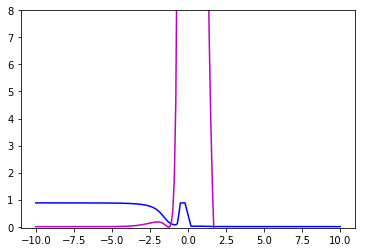

In [2]:
import numpy as np
from math import e

# Define f and f_derivative_val
def sigmoid(x):
    return 1/(1 + e**-x)

def f(z):
    return sigmoid(-6* sigmoid(z + 5 * z ** -2 + 3 * z ** -3) + 2 * sigmoid(-z + 4 * z ** -2))
    
# Define f_derivative_val
def f_derivative_val(x):
    return -(2* ((4 * x**4 - 22 * x - 27) * e**x + 8 * x**5 + 4 * x**4 + 22 * x**2 - 4 * x - 27) * e**(2*x))/(x**4 * (e**x + 1)**3) 

# Plot the function f
x_vals = np.append(np.arange(-10, -0.1, 0.1), np.arange(0.2, 10.01, 0.1))
#print(x_vals)
f_vals = f(x_vals)
#print(f_vals)
plt.plot(x_vals, f_vals, color='b')

# Plot the derivative of the function f
f_derivative_vals = f_derivative_val(x_vals)
plt.ylim(ymax=8)
plt.plot(x_vals, f_derivative_vals, color='m')

/Users/mo/miniconda3/envs/nnia/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':


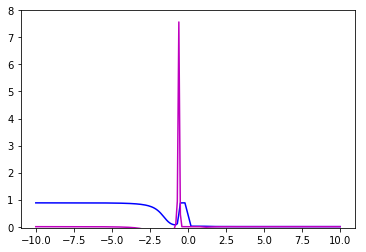

In [7]:
import numpy as np
from math import e

# Define f and f_derivative_val
def sigmoid(x):
    return 1/(1 + e**-x)

def sigmoid_der(x):
    return e**x/(((e**x)+1)**2)

def f(z):
    return sigmoid(-6* sigmoid(z + 5 * z ** -2 + 3 * z ** -3) + 2 * sigmoid(-z + 4 * z ** -2))
    
# Define f_derivative_val
def f_derivative_val(x):

    a = 2* sigmoid(-x+4*x**(-2))
    b = -6 * (sigmoid(x+5*x**(-2)+3*x**(-3)))
    
    a_der = 2 * sigmoid_der(-x+4*x**(-2))*(- 1 - 8 * x**(-3))
    b_der = -6 * (sigmoid_der(x+5*x**(-2)+3*x**(-3))) * (1-10 * x ** (-3) - 9*x**(-4))
    
    return sigmoid_der(a+b) * (a_der + b_der)

# Plot the function f
x_vals = np.append(np.arange(-10, -0.1, 0.1), np.arange(0.2, 10.01, 0.1))
#print(x_vals)
f_vals = f(x_vals)
#print(f_vals)
plt.plot(x_vals, f_vals, color='b')

# Plot the derivative of the function f
f_derivative_vals = f_derivative_val(x_vals)
plt.ylim(ymax=8)
plt.plot(x_vals, f_derivative_vals, color='m')

#### Questions (1 point)
1.) What is the main difference in the program structure between TensorFlow and plain Python? (0.5 point)

...

2.) Does TensorFlow provide numerical or automatic differentiation? What are advantages of this way of differentiation? (0.5 point)
It uses automatic differentiation and decomposes complex expressions into constituent parts using chain rule. --> Advantage??


## Submission instructions
You should provide a single Jupyter notebook as a solution. The naming should include the assignment number and matriculation IDs of all team members in the following format:
**assignment-1_matriculation1_matriculation_2_matriculation3.ipynb** (in case of 3 team members). 
Make sure to keep the order matriculation1_matriculation_2_matriculation3 the same for all assignments.

Please, submit your solution to your tutor (with **[NNIA][assignment-2]** in email subject):
1. Maksym Andriushchenko s8mmandr@stud.uni-saarland.de
2. Marius Mosbach s9msmosb@stud.uni-saarland.de
3. Rajarshi Biswas rbisw17@gmail.com
4. Marimuthu Kalimuthu s8makali@stud.uni-saarland.de

**If you are in a team, please submit only 1 solution to only 1 tutor.**